In [1]:
import pandas as pd
df = pd.read_csv('ten-year-scrape.csv', encoding= 'unicode_escape')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
pd.set_option('display.max_columns', None)

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df.head(3)

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_party,sponsor_name
0,S7728,https://www.nysenate.gov/legislation/bills/201...,Establishes a beer production tax credit for b...,"July 18, 2012",Tax,ZELDIN,Republican,Lee Zeldin
1,S6193,https://www.nysenate.gov/legislation/bills/201...,"Authorizes assessor of the town of Islip, coun...","July 18, 2012",Property Tax,ZELDIN,Republican,Lee Zeldin
2,S7131,https://www.nysenate.gov/legislation/bills/201...,Relates to limiting base proportion for the 20...,"June 29, 2012",Property Tax,ZELDIN,Republican,Lee Zeldin


In [3]:
df.bill_section.nunique()

221

In [4]:
df.dtypes

bill_number         object
bill_link           object
bill_description    object
bill_date           object
bill_section        object
bill_sponsor        object
sponsor_party       object
sponsor_name        object
dtype: object

In [5]:
df.bill_section.value_counts().head(5)

Tax                           386
Property Tax                  314
Environmental Conservation    281
Public Health                 266
Education                     257
Name: bill_section, dtype: int64

<AxesSubplot:>

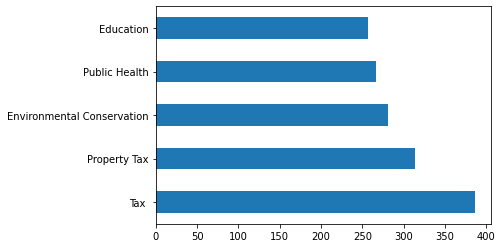

In [6]:
df.bill_section.value_counts().head(5).plot(kind='barh')

In [7]:
df.groupby(by='sponsor_party').bill_section.count()

sponsor_party
Democrat              3339
Independence Party      55
Independent              6
Republican            1538
Name: bill_section, dtype: int64

In [8]:
df.query('sponsor_party == "Republican"').bill_section.value_counts().head(5)

Tax                               186
Property Tax                      110
Highway                            85
Environmental Conservation         83
Retirement and Social Security     80
Name: bill_section, dtype: int64

In [9]:
df.query('sponsor_party == "Democrat"').bill_section.value_counts().head(5)

Public Health                 204
Property Tax                  198
Environmental Conservation    188
Education                     186
Tax                           173
Name: bill_section, dtype: int64

In [10]:
df.query('bill_section == "Military and veterans"').groupby(by='sponsor_party').count()

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_name
sponsor_party,,,,,,,
Democrat,8,8,8,8,8,8,8
Republican,6,6,6,6,6,6,6


In [11]:
df.query('bill_section == "Environmental Conservation"').groupby(by='sponsor_party').count()

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_name
sponsor_party,,,,,,,
Democrat,188,188,188,188,188,188,188
Independence Party,10,10,10,10,10,10,10
Republican,83,83,83,83,83,83,83


In [12]:
df.bill_section.value_counts()

Tax                           386
Property Tax                  314
Environmental Conservation    281
Public Health                 266
Education                     257
                             ... 
Personal Property               1
General Construction            1
Genesee County                  1
St. rence County                1
Dutchess County                 1
Name: bill_section, Length: 221, dtype: int64

In [13]:
df.query('bill_section == "Public Health"').groupby(by='sponsor_party').count()

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_name
sponsor_party,,,,,,,
Democrat,204,204,204,204,204,204,204
Republican,58,58,58,58,58,58,58


In [14]:
df.sponsor_party.value_counts()

Democrat              3339
Republican            1538
Independence Party      55
Independent              6
Name: sponsor_party, dtype: int64

In [15]:
df['bill_date'] = pd.to_datetime(df['bill_date'], errors='coerce')

In [16]:
df.head(4)

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_party,sponsor_name
0,S7728,https://www.nysenate.gov/legislation/bills/201...,Establishes a beer production tax credit for b...,2012-07-18,Tax,ZELDIN,Republican,Lee Zeldin
1,S6193,https://www.nysenate.gov/legislation/bills/201...,"Authorizes assessor of the town of Islip, coun...",2012-07-18,Property Tax,ZELDIN,Republican,Lee Zeldin
2,S7131,https://www.nysenate.gov/legislation/bills/201...,Relates to limiting base proportion for the 20...,2012-06-29,Property Tax,ZELDIN,Republican,Lee Zeldin
3,S5196,https://www.nysenate.gov/legislation/bills/201...,Relates to the regulation of certain types of ...,2011-08-17,Environmental Conservation,ZELDIN,Republican,Lee Zeldin


In [17]:
df.dtypes

bill_number                 object
bill_link                   object
bill_description            object
bill_date           datetime64[ns]
bill_section                object
bill_sponsor                object
sponsor_party               object
sponsor_name                object
dtype: object

In [18]:
df['bill_year'] = df['bill_date'].dt.to_period('Y')

In [19]:
df.head(10)

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_party,sponsor_name,bill_year
0,S7728,https://www.nysenate.gov/legislation/bills/201...,Establishes a beer production tax credit for b...,2012-07-18,Tax,ZELDIN,Republican,Lee Zeldin,2012
1,S6193,https://www.nysenate.gov/legislation/bills/201...,"Authorizes assessor of the town of Islip, coun...",2012-07-18,Property Tax,ZELDIN,Republican,Lee Zeldin,2012
2,S7131,https://www.nysenate.gov/legislation/bills/201...,Relates to limiting base proportion for the 20...,2012-06-29,Property Tax,ZELDIN,Republican,Lee Zeldin,2012
3,S5196,https://www.nysenate.gov/legislation/bills/201...,Relates to the regulation of certain types of ...,2011-08-17,Environmental Conservation,ZELDIN,Republican,Lee Zeldin,2011
4,S4092,https://www.nysenate.gov/legislation/bills/201...,"Authorizes Hands Across Long Island, Inc. to r...",2013-11-13,Property Tax,ZELDIN,Republican,Lee Zeldin,2013
5,S5639,https://www.nysenate.gov/legislation/bills/201...,"Authorizes New York 811, Inc. to receive retro...",2013-11-13,Property Tax,ZELDIN,Republican,Lee Zeldin,2013
6,S5367,https://www.nysenate.gov/legislation/bills/201...,Authorizes Saint John's Evangelical Lutheran C...,2013-10-21,Property Tax,ZELDIN,Republican,Lee Zeldin,2013
7,S5722,https://www.nysenate.gov/legislation/bills/201...,Extends the authorization of the village of Pa...,2013-07-31,Villages,ZELDIN,Republican,Lee Zeldin,2013
8,S5027,https://www.nysenate.gov/legislation/bills/201...,Relates to limiting base proportion for the 20...,2013-07-31,Property Tax,ZELDIN,Republican,Lee Zeldin,2013
9,S5838,https://www.nysenate.gov/legislation/bills/201...,Relates to management of the American lobster;...,2013-07-31,Environmental Conservation,ZELDIN,Republican,Lee Zeldin,2013


<AxesSubplot:ylabel='bill_year,bill_section'>

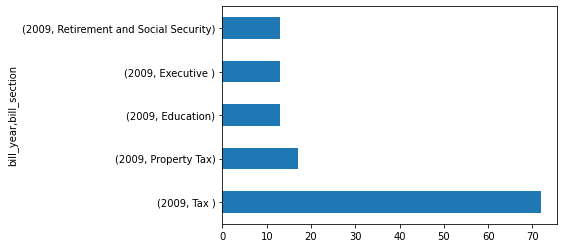

In [36]:
df.groupby(by='bill_year').bill_section.value_counts().head(5).plot(kind='barh')

In [ ]:
df.groupby(by='bill_year')